In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
driver_df = pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\driver-data.csv")
driver_df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
driver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
#dropping the id column

driver_df.drop('id' , axis=1 , inplace = True)

KeyError: "['id'] not found in axis"

In [7]:
driver_df.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


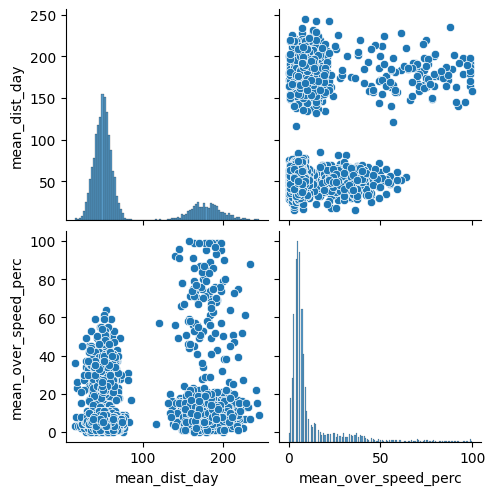

In [8]:
# visual analysis to identify the optimal number of clusters

sns.pairplot(driver_df)
plt.show()

From the above plots, we can identify that the possible number of clusters in this dataset = 2 

# Let's build the KMeans model

In [9]:
from sklearn.cluster import KMeans

In [11]:
kmeans_model = KMeans(n_clusters = 2) #n_clusters parameter represents the K value

In [12]:
kmeans_model.fit(driver_df)

C:\Users\827180\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [13]:
#taking a look at the centroid values

print("Centroid co-ordinates of the 2 clusters are : ")
print("===============================================")

print(kmeans_model.cluster_centers_)

Centroid co-ordinates of the 2 clusters are : 
[[ 50.04763438   8.82875   ]
 [180.017075    18.29      ]]


In [14]:
print("Cluster labels for various data points present in the dataset are :")

print(kmeans_model.labels_)

Cluster labels for various data points present in the dataset are :
[0 0 0 ... 1 1 1]


In [15]:
driver_df["Cluster labels"] = kmeans_model.labels_

In [16]:
driver_df.head(10)

,mean_dist_day,mean_over_speed_perc,Cluster labels
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0
5,41.91,10,0
6,58.64,20,0
7,52.02,8,0
8,31.25,34,0
9,44.31,19,0


In [17]:
driver_df.tail(10)

,mean_dist_day,mean_over_speed_perc,Cluster labels
3990,203.80,22,1
3991,167.05,10,1
3992,177.48,19,1
3993,170.22,16,1
3994,209.76,18,1
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1
3999,168.03,9,1


# Visualize the clusters

In [18]:
# plot the data 

sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=driver_df, hue='Cluster labels',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)
plt.show()

TypeError: lmplot() got multiple values for argument 'data'

# Elbow method using WCSS

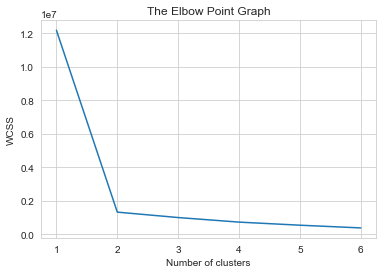

In [23]:
wcss = []
for i in range(1, 7):
    kmeans1 = KMeans(n_clusters = i)
    kmeans1.fit(driver_df)
   #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans1.inertia_)  

    
#Plotting The Elbow graph
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# End of Partitional clustering (KMeans algorithm)